# Machine Learning Final Project

## 1. Import some required libraries
+ numpy: Performs numerical computations on arrays.
+ pandas: Handles data in table format.
+ matplotlib.pyplot: Creates graphs and visualizations

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# set graph's background
plt.style.use("seaborn-v0_8-whitegrid")

## Load data

In [7]:
df = pd.read_csv('data/Malware_subset.csv')

In [8]:
df.isnull().sum().sum()
# data doesnt have missing data.

0

## Data Preprocessing

In [10]:
df.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,43399,443,6,36586,1,1,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
1,40422,443,6,36984,1,1,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
2,56977,80,6,15638963,5,5,405.0,448.0,405.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
3,60652,80,6,15660249,5,5,405.0,448.0,405.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
4,44512,80,6,14456391,5,3,268.0,519.0,268.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded = encoder.fit_transform(df['Label'])
df['Label'] = encoder.fit_transform(df['Label'])

Input:
+ Protocol
+ Flow Duration
+ Fwd and Backward Packets
+ Bwd Packet Length
+ Flow IAT
+ Header Length
+ Packets Length
+ FIN Flag Count


In [13]:
df.columns

Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std',

Init_Win_bytes_forward
Init_Win_bytes_backward
act_data_pkt_fwd
min_seg_size_forward
Active Mean
Idle Mean

In [15]:
def drop(remove_lists, DF = df):
    for x in remove_lists:
        print(f"{x} is removed")

In [16]:
drop([' Source Port', ' Destination Port'])

 Source Port is removed
 Destination Port is removed


#### Not depend on Port.


In [18]:
def show(x, y, data_frame = df):
    plt.scatter(data_frame[x], data_frame[y], c=data_frame['Label'] * 10, cmap='viridis');

def show_count(x):
    table = dict(df.groupby('Label')[x].mean())
    plt.bar(table.keys(), table.values());

In [19]:
# show('Active Mean', 'Idle Mean', df)

In [20]:
# show(' Flow Duration', 'Active Mean')

In [121]:
pd.set_option("display.max_columns", None)  # Show all columns
test = df.groupby('Label').agg(['max', 'min', 'mean'])
test

Source Port                    Destination Port                   \
               max min          mean               max min         mean   
Label                                                                     
0            65516   0  40043.293105             65165   0  4850.339776   
1            65532   0  39083.669941             64977   0  5432.750288   
2            65531   0  38916.548082             64629   0  5609.523750   
3            65529   0  40954.048607             65401   0  3948.379218   
4            65526   0  38161.758015             65155   0  6012.855227   
5            65534   0  38743.649369             65219   0  5422.853658   
6            65528   0  39444.429529             64731   0  5108.436328   
7            65516   0  38977.214982             62370   0  5014.754010   
8            65517   0  38973.331415             63931   0  5273.261261   
9            65532   0  39531.253753             63961   0  5734.581102   
10           65533   0  38493.869470             65320   0  5880.003020   

       Protocol                Flow Duration                    \
            max min      mean            max min          mean   
Label                                                            
0            17   0  8.048082      119989924   1  1.005502e+07   
1            17   0  8.584774      119998075   2  1.187979e+07   
2            17   0  8.518929      119999969   1  1.214362e+07   
3            17   0  8.011667      119999850   1  1.036714e+07   
4            17   0  8.994480      119969646   4  9.267005e+06   
5            17   0  9.049068      119998653   1  8.866999e+06   
6            17   0  8.388252      119991002   1  9.468045e+06   
7            17   0  8.605495      119978869   2  1.329547e+07   
8            17   0  8.646457      119999657   1  1.227575e+07   
9            17   0  8.650035      119995515   1  8.931815e+06   
10           17   0  8.204480      119999927  -1  1.035053e+07   

       Total Fwd Packets                 Total Backward Packets      \
                     max min       mean                     max min   
Label                                                                 
0                   8421   1   6.364145                   13540   0   
1                   2535   1   7.021049                    4169   0   
2                   3381   1   7.527264                    7012   0   
3                  17877   1  35.994156                   55652   0   
4                   2262   1   5.836708                    6265   0   
5                   9876   1   6.413894                   10457   0   
6                   2096   1   6.838306                    5849   0   
7                   1673   1   7.979047                    3284   0   
8                   1874   1   7.741030                    3608   0   
9                   3300   1   6.425170                   10634   0   
10                  4734   1   7.747450                   12897   0   

                 Total Length of Fwd Packets                    \
            mean                         max  min         mean   
Label                                                            
0       9.133007                    117112.0  0.0   523.317776   
1       8.017499                     99912.0  0.0   567.723060   
2       8.713695                    135349.0  0.0   597.706774   
3      52.949313                   3321962.0  0.0  2630.929126   
4       7.781538                    183599.0  0.0   526.619380   
5       8.817894                  14385522.0  0.0   960.810920   
6      10.747245                    181859.0  0.0   579.097699   
7       9.239236                     82536.0  0.0   585.890552   
8       9.455833                     90648.0  0.0   557.332892   
9       9.678313                    117541.0  0.0   558.579104   
10     11.795188                   6515047.0  0.0   733.702661   

       Total Length of Bwd Packets                     Fwd Packet Length Max  \
                               

In [123]:
from IPython.display import display

styled_df = test.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
)
display(styled_df)


Bwd/Fwd Header Length
Fwd Header Length.1	
Subflow Fwd/Bwd Packets	
min_seg_size_forward
Total Fwd Packets / Total Length of Bwd Packets
Fwd Packet Length Std	
Bwd Packet Length Std	
Flow Bytes/s	
Flow Packets/s	
Flow IAT Std	
Fwd Packets/s	/ Bwd Packets/s	
Min Packet Length	

In [101]:
selected_features = [' Bwd Header Length', ' Fwd Header Length.1', ' Subflow Bwd Packets', ' min_seg_size_forward', 
                    ' Total Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Std', ' Bwd Packet Length Std',
                    'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Std', 'Fwd Packets/s', ' Min Packet Length']

for x in selected_features:
    if not x in df.columns:
        print(x)

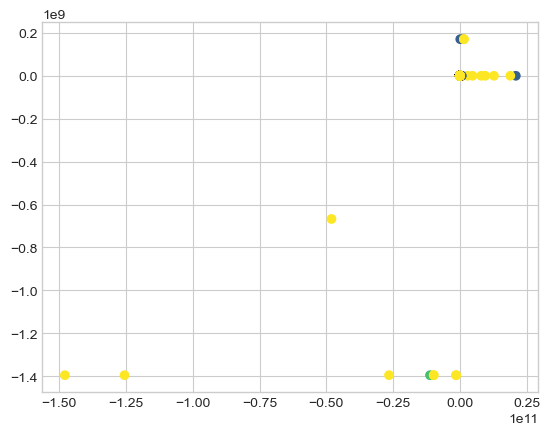

In [137]:
test[' Fwd Header Length.1']
df[' Fwd Header Length.1']
show(' Fwd Header Length.1', ' min_seg_size_forward', df)